In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/deveshriiii/Downloads/ratings_Beauty.csv')

In [7]:
df.shape

(2023070, 4)

In [8]:
df.describe(include = 'all')

,UserId,ProductId,Rating,Timestamp
count,2023070,2023070,2.023070e+06,2.023070e+06
unique,1210271,249274,NaN,NaN
top,A3KEZLJ59C1JVH,B001MA0QY2,NaN,NaN
freq,389,7533,NaN,NaN
mean,NaN,NaN,4.149036e+00,1.360389e+09
std,NaN,NaN,1.311505e+00,4.611860e+07
min,NaN,NaN,1.000000e+00,9.087552e+08
25%,NaN,NaN,4.000000e+00,1.350259e+09
50%,NaN,NaN,5.000000e+00,1.372810e+09
75%,NaN,NaN,5.000000e+00,1.391472e+09


In [10]:
missing_data = pd.DataFrame(df.isnull().mean()*100)
missing_data

,0
UserId,0.0
ProductId,0.0
Rating,0.0
Timestamp,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [14]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [15]:
# IQR
Q1 = np.percentile(df['Rating'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Rating'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


# Above Upper bound
upper = df['Rating'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df['Rating'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0          False
1          False
2          False
3          False
4          False
           ...  
2023065    False
2023066    False
2023067    False
2023068    False
2023069    False
Name: Rating, Length: 2023070, dtype: bool
(array([], dtype=int64),)
Lower bound: 0          False
1          False
2          False
3          False
4           True
           ...  
2023065    False
2023066    False
2023067    False
2023068    False
2023069    False
Name: Rating, Length: 2023070, dtype: bool
(array([      4,      23,      30, ..., 2022846, 2022913, 2022969]),)


In [16]:
df['Rating'][4]

1.0

In [ ]:
EXPLORATORY DATA ANALYSIS

In [ ]:
Total count of each rati

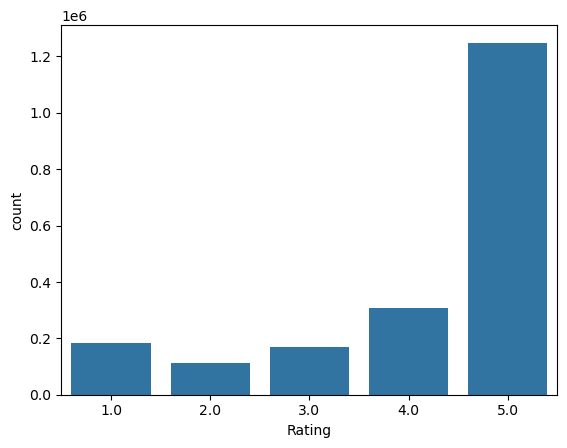

In [18]:
sns.countplot(x='Rating', data=df)
plt.show()

In [24]:
len(df['UserId'].unique())

1210271

In [ ]:
TOP PRODUCTS BASED ON SALES

In [25]:
#Top 20 Products based on sales.

a = list(df['ProductId'].value_counts())
b = list(df['ProductId'].unique())
top_20_products = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['ProductID', 'Count'])
top_20_products

,ProductID,Count
0,0205616461,7533
1,0558925278,2869
2,0733001998,2477
3,0737104473,2143
4,0762451459,2088
5,1304139212,2041
6,1304139220,1918
7,130414089X,1885
8,130414643X,1838
9,1304146537,1589


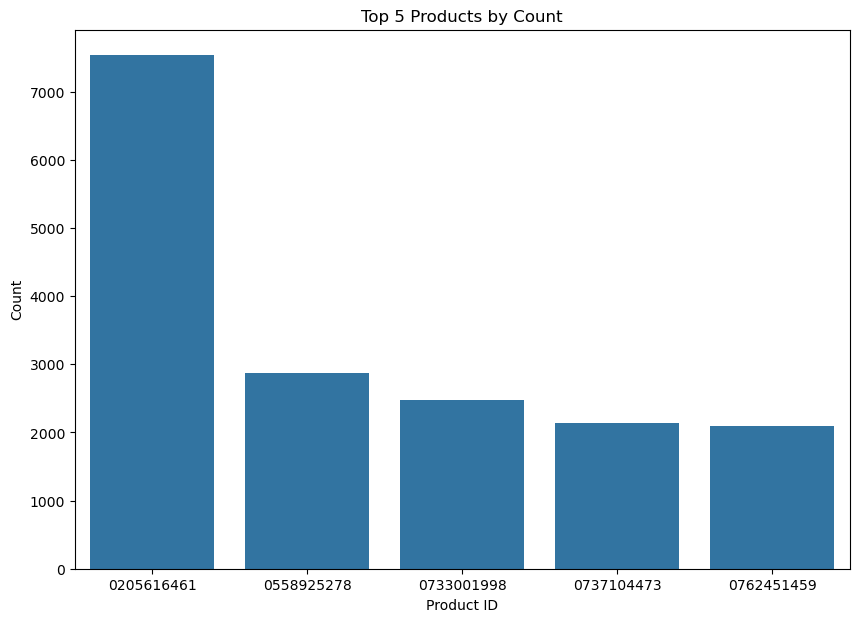

In [26]:
plt.figure(figsize=(10, 7))
sns.barplot(x=top_20_products['ProductID'].head(5), y=top_20_products['Count'].head(5))
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Top 5 Products by Count')
plt.show()

In [ ]:
Number of Unique users

In [27]:
print('Number of unique users', len(df['UserId'].unique()))

Number of unique users 1210271


In [28]:
#top 20 users based on count of orders placed.

a = list(df['UserId'].value_counts())
b = list(df['UserId'].unique())
top_20_Users = pd.DataFrame(list(zip(b[0:21],a[0:21])),columns =['UserID', 'Count'])
top_20_Users

,UserID,Count
0,A39HTATAQ9V7YF,389
1,A3JM6GV9MNOF9X,336
2,A1Z513UWSAAO0F,326
3,A1WMRR494NWEWV,278
4,A3IAAVS479H7M7,276
5,AKJHHD5VEH7VG,275
6,A1BG8QW55XHN6U,269
7,A22VW0P4VZHDE3,259
8,A3V3RE4132GKRO,249
9,A327B0I7CYTEJC,225


In [ ]:
Number of Unique Products

In [29]:
print('Number of unique products', len(df['ProductId'].unique()))

Number of unique products 249274


In [ ]:
Different types of Ratings

In [30]:
print('Unique Ratings',df['Rating'].unique())

Unique Ratings [5. 3. 4. 1. 2.]


In [ ]:
Number of products with good ratings

In [32]:
max_ratings1 = df[df['Rating'] >= 4.0]
print('Number of unique products rated high',len(max_ratings1['ProductId'].unique()))

Number of unique products rated high 220746


In [ ]:
MODEL PREPARATION

In [34]:
df.drop('Timestamp',axis=1,inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2, random_state=0)

In [39]:
test_data.head()

,UserId,ProductId,Rating
723411,A23ZJBVZ4OLDJ,B001KNHM4I,3.0
1472875,A3O52IDYQ4Z66H,B0062U1QC8,4.0
2000120,A1PDYBT822BHNJ,B00I14O9C2,5.0
2014061,A14F5W1N7CZDVW,B00JDTFBR6,5.0
1076951,A2EPK0CT24CZHS,B003O3C06M,4.0


In [101]:
train_data.head()

,UserId,ProductId,Rating
1820811,A3T41HVBC1PSCO,B00B1OOZU0,5.0
1541414,A24Y7P9O9LU6TH,B006Z9ACMG,5.0
783039,A1F7YU6O5RU432,B001T8MD8Y,5.0
1699677,A1HCJ5CDLNWJPJ,B008U4AR3I,5.0
787779,APDELNTXEZAX4,B001TXFMD2,4.0


In [ ]:
MODEL 1: POPULARITY BASED RECOMMENDER MODEL

In [103]:
train_data_grouped = train_data.groupby('ProductId').mean(numeric_only=True).reset_index()

In [105]:
train_data_grouped.head()

,ProductId,Rating
0,0558925278,3.0
1,0733001998,4.0
2,0737104473,1.0
3,0762451459,5.0
4,1304139220,5.0


In [107]:
train_data_sort = train_data_grouped.sort_values(['Rating', 'ProductId'], ascending=False)

In [109]:
train_data_sort.head()

,ProductId,Rating
226740,B00LU0LTOU,5.0
226739,B00LPVG6V0,5.0
226738,B00LP2YB8E,5.0
226737,B00LOS7MEE,5.0
226736,B00LORWRJA,5.0


In [111]:
train_data.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head(10)

ProductId
B001MA0QY2    5978
B0009V1YR8    2266
B0043OYFKU    1998
B0000YUXI0    1711
B003V265QW    1704
B000ZMBSPE    1649
B003BQ6QXK    1555
B004OHQR1Q    1505
B00121UVU0    1457
B000FS05VG    1266
Name: Rating, dtype: int64

In [113]:
ratings_mean_count = pd.DataFrame(train_data.groupby('ProductId')['Rating'].mean())

In [115]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('ProductId')['Rating'].count())

In [117]:
ratings_mean_count.head()

,Rating,rating_counts
ProductId,,
0558925278,3.0,1
0733001998,4.0,1
0737104473,1.0,1
0762451459,5.0,1
1304139220,5.0,1


In [119]:
pred_df = test_data[['UserId', 'ProductId', 'Rating']]

In [121]:
pred_df.head()

,UserId,ProductId,Rating
723411,A23ZJBVZ4OLDJ,B001KNHM4I,3.0
1472875,A3O52IDYQ4Z66H,B0062U1QC8,4.0
2000120,A1PDYBT822BHNJ,B00I14O9C2,5.0
2014061,A14F5W1N7CZDVW,B00JDTFBR6,5.0
1076951,A2EPK0CT24CZHS,B003O3C06M,4.0


In [123]:
pred_df.rename(columns = {'Rating' : 'true_ratings'}, inplace=True)

In [125]:
pred_df.head()

,UserId,ProductId,true_ratings
723411,A23ZJBVZ4OLDJ,B001KNHM4I,3.0
1472875,A3O52IDYQ4Z66H,B0062U1QC8,4.0
2000120,A1PDYBT822BHNJ,B00I14O9C2,5.0
2014061,A14F5W1N7CZDVW,B00JDTFBR6,5.0
1076951,A2EPK0CT24CZHS,B003O3C06M,4.0


In [127]:
pred_df = pred_df.merge(train_data_sort, left_on='ProductId', right_on = 'ProductId')

In [129]:
pred_df.rename(columns = {'Rating' : 'predicted_ratings'}, inplace = True)

In [ ]:
POPULARITY BASED MODEL

In [131]:
pred_df.head()

,UserId,ProductId,true_ratings,predicted_ratings
0,A23ZJBVZ4OLDJ,B001KNHM4I,3.0,4.575758
1,A3O52IDYQ4Z66H,B0062U1QC8,4.0,4.750000
2,A1PDYBT822BHNJ,B00I14O9C2,5.0,4.285714
3,A14F5W1N7CZDVW,B00JDTFBR6,5.0,4.418605
4,A2EPK0CT24CZHS,B003O3C06M,4.0,4.727273


In [133]:
import sklearn.metrics as metric

from math import sqrt

MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])

print('The RMSE value for Recommender model is', sqrt(MSE))

The RMSE value for Recommender model is 1.3078273121694615


In [ ]:
MODEL 2: COLLABORATIVE FILTERING USING SURPRISE LIBRARY

In [135]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-macosx_11_0_arm64.whl size=485267 sha256=6cf237faf9810d291ad62f0c67da4edf7efb6d243680ace9ef9a7884640c442a
  Stored in directory: /Users/deveshriiii/Library/Caches/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [137]:
import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [139]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [141]:
userID = df.groupby('UserId').count()

In [143]:
top_user = userID[userID['Rating'] >= 50].index 

In [145]:
topuser_ratings_df = df[df['UserId'].isin(top_user)]

In [147]:
topuser_ratings_df.sort_values(by = 'Rating', ascending = False).head()

,UserId,ProductId,Rating
5,AKJHHD5VEH7VG,0762451459,5.0
1779178,ACZ94JB8BFMJ9,B00A9MKPT0,5.0
1778023,A10G136JEISLVR,B00A8I8AVA,5.0
1778730,A1Z54EM24Y40LL,B00A8S6HM4,5.0
1778920,A2K7V3G4598QRF,B00A93VUEI,5.0


In [149]:
prodID = df.groupby('ProductId').count()

In [151]:
top_prod = prodID[prodID['Rating'] >= 50].index

In [153]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['ProductId'].isin(top_prod)]

In [155]:
top_ratings_df.sort_values(by='Rating', ascending=False).head()

,UserId,ProductId,Rating
1717,A2FQZKL2KIZACO,9790790961,5.0
1436380,A2S7YBFPZX1IGQ,B005OZW3ZG,5.0
1435690,A1APERZNMEU8PW,B005OZGDO8,5.0
1435806,A1YVJ2CLK0L2WR,B005OZH88I,5.0
1435808,ADMPGWBF0BC9W,B005OZH88I,5.0


In [157]:
top_ratings_df.shape

(13717, 3)

In [ ]:
Conversion to surprise format

In [159]:
reader = Reader(rating_scale=(0.5, 5.0))

In [161]:
data = Dataset.load_from_df(top_ratings_df[['UserId', 'ProductId', 'Rating']],reader)

In [ ]:
MODEL TRAINING

In [163]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [165]:
type(trainset)

surprise.trainset.Trainset

In [ ]:
KNN with means

In [167]:
model = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
SVD

In [171]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

In [ ]:
EVALUATION OF ALL MODELS

In [ ]:
POPULARITY BASED MODEL

In [173]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.3078273121694615


In [ ]:
COLLABORATIVE BASED FILTERING

In [175]:
print(len(testset))
type(testset)

4116


list

In [ ]:
KNN WITH MEANS

In [177]:
test_pred = model.test(testset)
test_pred[0]

Prediction(uid='A25C2M3QF9G7OQ', iid='B009YSSLAU', r_ui=4.0, est=4.516699820834101, details={'actual_k': 10, 'was_impossible': False})

In [179]:
accuracy.rmse(test_pred)

RMSE: 1.0561


1.0561184327784499

In [ ]:
SVD

In [181]:
test_pred = svd_model.test(testset)

In [183]:
accuracy.rmse(test_pred)

RMSE: 1.0113


1.0112703996513175

In [ ]:
HYPER PARAMETER TUNING OF SVD MODEL

In [185]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [187]:
gs.fit(data)

In [189]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [191]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8965


0.8965175001779915

In [ ]:
RECOMMENDING 5 PRODUCTS

In [193]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [195]:
top_n = get_top_n(test_pred, n=5)

In [197]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A25C2M3QF9G7OQ ['B009YSSLAU', 'B00AO4EMKQ', 'B006L6A06Q', 'B00HSNWZKU', 'B00HSNWXVQ']
AY3D7DG5L5WCK ['B00GTBZHUW', 'B00AWLB9G6', 'B00A0J09C0', 'B00AAIOP44', 'B00GTBZHCA']
A2DPYMNI2HCIOI ['B00014D5O8', 'B008U2Y9BQ', 'B008RVYJS8', 'B0002VQ0WO', 'B0014AX89K']
A2Y4S4CNGKF21S ['B00021B8L2', 'B0012UEJ1S', 'B000U0XGME', 'B00069FJUG', 'B003I6O5RC']
AYB4ELCS5AM8P ['B004GIM68G', 'B001ECQ4JE', 'B008VSYO5A', 'B00A0J084Y', 'B00AE0790U']
A3GPAR4H5Y5OU8 ['B000GUN98O', 'B001ECQ4JE', 'B0030O3VRW', 'B003WN1ELQ', 'B001JQLNNC']
A3IOCPLIMYDBCD ['B004YZMKKU', 'B002QXINAS', 'B007E0FQ1W', 'B001GIOW3G', 'B001LF4I8I']
ALNFHVS3SC4FV ['B005TI7NPI', 'B004Z209HS', 'B003V21WO2', 'B001ECQ5CA', 'B00GTBZHUW']
AQY5XBYSENNZQ ['B00GTBZHUW', 'B006L6A06Q', 'B001U0ONNY', 'B00AE0790U', 'B00GTBZNP6']
A3091RP0SPZLMN ['B00AE07FUE', 'B00ALV8EJM', 'B00AE07CTI', 'B00GTC02LA', 'B002MO3CG6']
A3AZI828WJN1CD ['B007RTR8UC', 'B006L6A06Q', 'B00A0IWRRG', 'B00AO4EBOI', 'B009VGNYFM']
A2XKJ1KX6XUHYP ['B002CML1XE', 'B000I5KCIW', 'B004CDQ73K', 